# Intervalos de Confianza y pruebas de hipótesis

## Intervalos de confianza


### Conceptos claves

* **Precisión de una estimación** - La precisión de una estimación se refiere a cuán cerca está la estimación del valor verdadero del parámetro poblacional.

* **Intervalo de confianza** - Un intervalo de confianza es un rango de valores que, con cierta confianza, se espera que contenga el valor verdadero del parámetro poblacional.

* **Margen de Error** - La amplitud del intervalo de confianza, que depende de la variabilidad en los datos, el tamaño de la muestra y el nivel de confianza deseado.

* **Nivel de confianza** - El nivel de confianza es la probabilidad de que el intervalo de confianza contenga el valor verdadero del parámetro poblacional. Generalmente se establece en 95% o 99%, lo que indica la frecuencia con la que se espera que el intervalo de confianza contenga el parámetro poblacional si se repite el experimento múltiples veces.

* **Significancia estadística** - Este nivel establece la probabilidad de cometer un error de Tipo I .

### Ejemplo Práctico: Utilidad de los Intervalos de Confianza

Supongamos que un investigador quiere estimar el peso promedio de los estudiantes en una universidad. No es práctico pesar a todos los estudiantes, así que el investigador pesa a una muestra aleatoria de 100 estudiantes y calcula el peso promedio de la muestra como 68 kg. Sin embargo, para tener una mejor idea de qué tan cercano es este número al promedio real (poblacional) de todos los estudiantes, el investigador calcula un intervalo de confianza.

**Datos:**

* Peso Promedio de la Muestra $\bar{x}=68 $ kg
* Desviación Estándar de la Muestra $s =10$  kg
* Tamaño de la Muestra $n = 100$
* Nivel de Confianza Deseado: 95%

### Cálculo del Intervalo de Confianza:

Para calcular un intervalo de confianza para la media, si la muestra es suficientemente grande y/o se asume una distribución normal, podemos usar la distribución $t$ de Student:

$$ \text{Intervalo de Confianza} = \bar{x} \pm t^* \left( \frac{s}{\sqrt{n}} \right) $$

Donde $t^*$ es el valor crítico $t$ para el 95% de confianza con $n-1$ grados de libertad.

In [1]:
import numpy as np
from scipy.stats import t

# Datos de ejemplo
x_bar = 68  # media muestral
s = 10      # desviación estándar muestral
n = 100     # tamaño de la muestra
confidence = 0.95

# Calculando el intervalo de confianza
t_critical = t.ppf((1 + confidence) / 2, n - 1)  # t crítico de dos colas
margin_error = t_critical * (s / np.sqrt(n))
ci_lower = x_bar - margin_error
ci_upper = x_bar + margin_error

print(f"Intervalo de confianza al {confidence*100}%: ({ci_lower:.2f}, {ci_upper:.2f})")


Intervalo de confianza al 95.0%: (66.02, 69.98)


In [2]:
t_critical

1.9842169515086827

In [3]:
t.ppf((1 - confidence) / 2, n - 1)

-1.9842169515086827

In [5]:
(1+confidence)/2

0.975

In [6]:
t.ppf((1 + confidence) / 2, n - 1)

1.9842169515086827

In [7]:
t.cdf(-1.9842169515086827, n - 1)

0.02500000000440139

In [8]:
t.sf(1.9842169515086827, n - 1)

0.02500000000440139

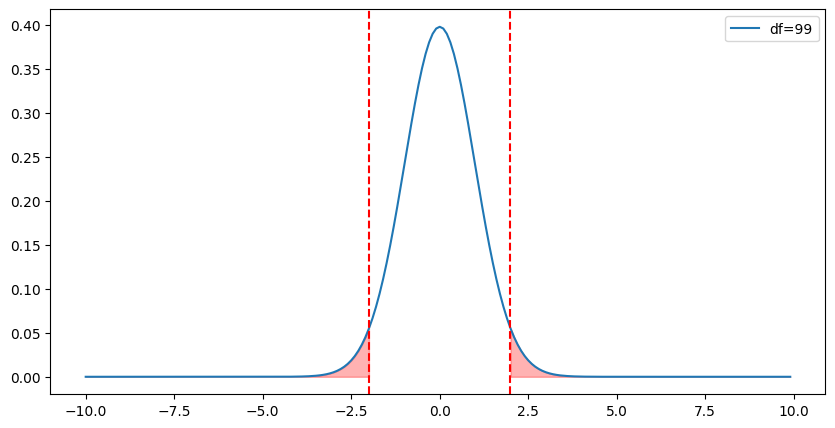

In [9]:
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)

y1 = t.pdf(x, n-1)

plt.figure(figsize=(10,5))
plt.plot(x, y1, label="df=99" )
plt.axvline(x=-t_critical , color='red', linestyle='--')
plt.axvline(x=t_critical , color='red', linestyle='--')
plt.fill_between(x, y1, where=(x <= -t_critical), color='red', alpha=0.3)
plt.fill_between(x, y1, where=(x >= t_critical), color='red', alpha=0.3)
plt.legend()
plt.show()

In [ ]:
(1+0.95)/2

0.975

### Utilidad del Intervalo de Confianza

El intervalo de confianza proporciona una estimación más informada sobre el peso promedio. En este ejemplo, si el intervalo de confianza calculado es, por ejemplo, (66.08, 69.92), esto significa que podemos estar 95% seguros de que el peso promedio real de todos los estudiantes se encuentra entre 66.08 kg y 69.92 kg.

## Intrvalo de confianza para desviaciones estándar conocidas

En algunos casos, la desviación estándar poblacional es conocida. En tales casos, el intervalo de confianza para la media se puede calcular utilizando la distribución normal estándar en lugar de la distribución $t$ de Student. La fórmula para el intervalo de confianza en este caso es:

$$ \text{Intervalo de Confianza} = \bar{x} \pm z^* \left( \frac{\sigma}{\sqrt{n}} \right) $$

Donde $z^*$ es el valor crítico $z$ para el nivel de confianza deseado.



In [17]:
import numpy as np
from scipy.stats import norm

# Datos de ejemplo
x_bar = 68  # media muestral
s = 10      # desviación estándar poblacional conocida
n = 100     # tamaño de la muestra
confidence = 0.95

# Calculando el intervalo de confianza
z_critical = norm.ppf((1 + confidence) / 2, 0,1)  # z crítico de dos colas
margin_error = z_critical * (s / np.sqrt(n))
ci_lower = x_bar - margin_error
ci_upper = x_bar + margin_error

print(f"Intervalo de confianza al {confidence*100}%: ({ci_lower:.2f}, {ci_upper:.2f})")


Intervalo de confianza al 95.0%: (66.04, 69.96)


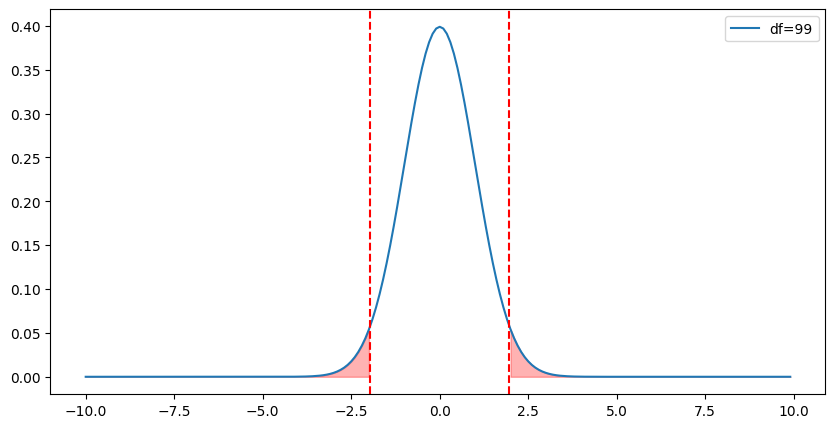

In [11]:
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0,1)

plt.figure(figsize=(10,5))
plt.plot(x, y1, label="df=99" )
plt.axvline(x=-z_critical , color='red', linestyle='--')
plt.axvline(x=z_critical , color='red', linestyle='--')
plt.fill_between(x, y1, where=(x <= -t_critical), color='red', alpha=0.3)
plt.fill_between(x, y1, where=(x >= t_critical), color='red', alpha=0.3)
plt.legend()
plt.show()

In [12]:
z_critical

1.959963984540054

In [13]:
norm.ppf((1 + confidence) / 2, 0,1)

1.959963984540054

In [14]:
norm.ppf((1 - confidence) / 2, 0,1)

-1.959963984540054

Si el intervalo de confianza calculado es, por ejemplo, $(0.589, 0.711)$, esto significa que podemos estar razonablemente seguros (99% de confianza) de que entre el 58.9% y el 71.1% de todos los consumidores preferirían el nuevo sabor del té helado. Este resultado puede ayudar a la compañía a tomar decisiones informadas sobre la producción y comercialización del nuevo producto.

### Intervalo de confianza para la proporción

El intervalo de confianza para la proporción se puede calcular utilizando la fórmula:

$$ \text{Intervalo de Confianza} = \hat{p} \pm z^* \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$

Donde $\hat{p}$ es la proporción muestral y $z^*$ es el valor crítico $z$ para el nivel de confianza deseado.

Tendremos que mientras $np \geq 5$ y $n(1 - p) \geq 5$ la distribución muestral de $\hat{p}$ se aproxima mediante una distribución
normal.

**Ejemplo**

Imaginemos que una compañía de bebidas quiere saber qué tan popular es su nuevo sabor de té helado entre sus consumidores. La compañía realiza una encuesta con una muestra aleatoria de 400 personas, de las cuales 260 expresan una preferencia por el nuevo sabor.

*Datos*

* Número de éxitos (personas que prefieren el nuevo sabor): $X = 260$

* Tamaño de la muestra: $𝑛 = 400$

* Proporción muestral (estimación puntual de la proporción):  $\hat{p} = \frac{260}{400} = 0.65$

### Cálculo del Intervalo de Confianza

Vamos a calcular un intervalo de confianza del 99% para la proporción de personas que prefieren el nuevo sabor.

In [20]:
# Datos
p_hat = 260 / 400  # Proporción muestral
n = 400            # Tamaño de la muestra
confidence_level = 0.99
z_star = norm.ppf((1 + confidence_level) / 2)  # Valor crítico z para 95% de confianza

# Cálculo del margen de error
margin_error = z_star * np.sqrt(p_hat * (1 - p_hat) / n)

# Cálculo del intervalo de confianza
ci_lower = p_hat - margin_error
ci_upper = p_hat + margin_error

print(f"Intervalo de confianza al 99%: ({ci_lower:.3f}, {ci_upper:.3f})")


Intervalo de confianza al 99%: (0.589, 0.711)


### ¿Qué sucede si aumentamos el nivel de confianza?

Si disminuimos el nivel de confianza, el intervalo de confianza se vuelve más estrecho, lo que significa que es más preciso pero menos confiable. Por otro lado, si aumentamos el nivel de confianza, el intervalo de confianza se vuelve más amplio, lo que significa que es más confiable pero menos preciso.

In [21]:
Confianza = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

for i in Confianza:
    p_hat = 260 / 400  # Proporción muestral
    n = 400            # Tamaño de la muestra
    confidence_level = i/100
    z_star = norm.ppf((1 + confidence_level) / 2)  # Valor crítico z para i% de confianza

    # Cálculo del margen de error
    margin_error = z_star * np.sqrt(p_hat * (1 - p_hat) / n)

    # Cálculo del intervalo de confianza
    ci_lower = p_hat - margin_error
    ci_upper = p_hat + margin_error
    print(f"Intervalo de confianza al {i}%: ({ci_lower:.4f}, {ci_upper:.4f}), Ancho del intervalo: {2*margin_error:.4f}")



Intervalo de confianza al 90%: (0.6108, 0.6892), Ancho del intervalo: 0.0785
Intervalo de confianza al 91%: (0.6096, 0.6904), Ancho del intervalo: 0.0809
Intervalo de confianza al 92%: (0.6082, 0.6918), Ancho del intervalo: 0.0835
Intervalo de confianza al 93%: (0.6068, 0.6932), Ancho del intervalo: 0.0864
Intervalo de confianza al 94%: (0.6051, 0.6949), Ancho del intervalo: 0.0897
Intervalo de confianza al 95%: (0.6033, 0.6967), Ancho del intervalo: 0.0935
Intervalo de confianza al 96%: (0.6010, 0.6990), Ancho del intervalo: 0.0980
Intervalo de confianza al 97%: (0.5982, 0.7018), Ancho del intervalo: 0.1035
Intervalo de confianza al 98%: (0.5945, 0.7055), Ancho del intervalo: 0.1110
Intervalo de confianza al 99%: (0.5886, 0.7114), Ancho del intervalo: 0.1229


# Pruebas de hipótesis

## Conceptos Claves

* **Hipótesis Nula ($H_0$)** - La hipótesis nula es una afirmación que se supone verdadera hasta que se demuestre lo contrario. Por lo general, se denota como $H_0$.

* **Hipótesis Alternativa ($H_1$)** - La hipótesis alternativa es la afirmación opuesta a la hipótesis nula. Por lo general, se denota como $H_1$ o $H_{\alpha}$.

* **Nivel de Significancia ($\alpha$)** - El nivel de significancia es la probabilidad de cometer un error de Tipo I, es decir, rechazar la hipótesis nula cuando es verdadera.

* **Valor $p$** - El valor $p$ es la probabilidad de obtener un resultado igual o más extremo que el observado, si la hipótesis nula es verdadera.

* **Estadístico de Prueba** - El estadístico de prueba es un valor calculado a partir de los datos que se utiliza para decidir si se rechaza la hipótesis nula.

* **Región Crítica** - La región crítica es el rango de valores del estadístico de prueba que lleva al rechazo de la hipótesis nula.



## Ejemplo

Supongamos que una compañía de juguetes afirma que el 80% de los niños menores de 10 años prefieren sus juguetes a los de la competencia. Para probar esta afirmación, se realiza una encuesta con una muestra aleatoria de 100 niños, de los cuales 75 prefieren los juguetes de la compañía.

*Datos*

* Número de éxitos (niños que prefieren los juguetes de la compañía): $X = 75$

* Tamaño de la muestra: $𝑛 = 100$

* Proporción muestral (estimación puntual de la proporción):  $\hat{p} = \frac{75}{100} = 0.75$

### Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: La proporción de niños que prefieren los juguetes de la compañía es igual al 80%. $H_0: p = 0.80$

* **Hipótesis Alternativa ($H_1$)**: La proporción de niños que prefieren los juguetes de la compañía no es igual al 80%. $H_1: p \neq 0.80$


## Ejemplo

Considere un determinado modelo de automóvil en el que el rendimiento de la gasolina es $24$ millas por galón. Un grupo de investigación elabora un nuevo sistema de inyección de combustible diseñado para dar un mejor rendimiento en millas por galón de gasolina. Para evaluar el nuevo sistema se fabrican varios de éstos, se instalan en los automóviles y se someten a pruebas controladas de manejo. En este caso, el grupo de investigación busca evidencias para concluir que
el nuevo sistema aumenta la media del rendimiento. La hipótesis de investigación es, entonces, que el nuevo sistema de inyección de combustible proporciona un rendimiento medio mayor a 24 millas por galón de combustible; es decir, $μ <24$.

**Como lineamiento general, una hipótesis de investigación se debe plantear como hipótesis alternativa.**

### Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: La media del rendimiento de la gasolina es igual o menor  a 24 millas por galón. $H_0: \mu \leq 24$

* **Hipótesis Alternativa ($H_1$)**: La media del rendimiento de la gasolina es mayor a 24 millas por galón. $H_1: \mu > 24$



## Ejemplo

Un fabricante de refrescos asegura que los envases de dos litros de refresco contienen en promedio, por lo menos, 67.6 onzas de líquido.

### Planteamiento de Hipótesis

* Hipótesis Nula ($H_0$): $\mu \geq 67.6$

* Hipótesis Alternativa ($H_1$): $\mu < 67.6$

## Tenga en cuenta que:

* Se suele suponer que la afirmación es verdad a menos que las evidencias muestrales indiquen lo contrario.

* La hipótesis nula se suele basar en la suposición de que la afirmación sea verdadera.

* La hipótesis nula siempre incluye una afirmación de igualdad ya sea en una desigualdad o sola.

* La hipótesis alternativa siempre incluye una afirmación de desigualdad.

* La hipótesis nula y la hipótesis alternativa son complementarias.

* Cuando se debe elegir entre dos líneas de acción La hipótesis nula se suele basar en la suposición que lleva a tomar una decisión positiva.




## Ejemplo

Suponga que una especificación para unas piezas determinadas sea que su longitud media deba ser de dos pulgadas. Si la longitud media es menor o mayor a dos pulgadas, las piezas ocasionarán problemas de calidad en la operación de ensamblado.

### Planteamiento de Hipótesis

* Hipótesis Nula ($H_0$): $\mu = 2$

* Hipótesis Alternativa ($H_1$): $\mu \neq 2$

## Tipos de pruebas

### Prueba de una cola

Una prueba de una cola es una prueba de hipótesis en la que la región crítica se encuentra en un solo lado de la distribución de probabilidad. Se utiliza cuando la hipótesis alternativa implica una dirección específica (mayor que o menor que).

### Prueba de dos colas

Una prueba de dos colas es una prueba de hipótesis en la que la región crítica se encuentra en ambos lados de la distribución de probabilidad. Se utiliza cuando la hipótesis alternativa implica una dirección no específica (diferente de).



| Tipo de Prueba    | Hipótesis Nula ($ H_0 $)   | Hipótesis Alternativa ($ H_1 $) |
|-------------------|------------------------------|-----------------------------------|
| Una cola (superior) | $ \mu \leq \mu_0 $         | $ \mu > \mu_0 $                 |
| Una cola (inferior) | $ \mu \geq \mu_0 $         | $ \mu < \mu_0 $                 |
| Dos colas          | $ \mu = \mu_0 $            | $ \mu \neq \mu_0 $              |


# Tipos de error



|                    | $ H_0 $ Verdadera   | $ H_1 $ Verdadera  |
|-------------------|------------------------------|-----------------------------------|
| $ H_0 $ Verdadera  |Conclusión correcta         | Error tipo II                |
| $ H_1 $ Verdadera  | Error tipo I       | Conclusión correcta                 |

En estadística, cuando realizamos pruebas de hipótesis, hay dos tipos principales de errores que pueden ocurrir, conocidos como error de Tipo I y error de Tipo II. Estos errores están relacionados con las conclusiones incorrectas que se pueden derivar del proceso de prueba de hipótesis.

Tipos de Error
* **Error de Tipo I **($𝛼$): Ocurre cuando la hipótesis nula $H_0$ es rechazada cuando en realidad es verdadera.

  Consecuencia: Aceptar incorrectamente la hipótesis alternativa $H_1$.

  Ejemplo: Un test médico indica erróneamente que un paciente tiene una enfermedad cuando en realidad está sano.

  Control: Se controla mediante el nivel de significancia $𝛼$, que generalmente se establece en 0.05 o 0.01, reflejando una tolerancia del 5% o 1% a cometer este error.

* **Error de Tipo II** ($\beta$): Ocurre cuando la hipótesis nula $H_0$ no es rechazada cuando en realidad es falsa.
    
  Consecuencia: No detectar un efecto o diferencia que realmente existe.
    
  Ejemplo: Un test médico no detecta una enfermedad que el paciente realmente tiene.
    
  Control: Aumentar el tamaño de la muestra puede ayudar a reducir el error de Tipo II, aumentando la potencia de la prueba (1 - $\beta$).



<table border="1">
    <tr>
        <th>Tipo de Error</th>
        <th>Símbolo</th>
        <th>Definición</th>
        <th>Consecuencia</th>
        <th>Ejemplo de Control</th>
    </tr>
    <tr>
        <td>Tipo I</td>
        <td>&alpha;</td>
        <td>Rechazo incorrecto de la hipótesis nula verdadera.</td>
        <td>Aceptación incorrecta de la hipótesis alternativa.</td>
        <td>Establecer un nivel de significancia bajo, típicamente 0.05 o 0.01.</td>
    </tr>
    <tr>
        <td>Tipo II</td>
        <td>&beta;</td>
        <td>Fallo al rechazar una hipótesis nula falsa.</td>
        <td>No detectar un efecto que realmente existe.</td>
        <td>Aumentar el tamaño de la muestra para mejorar la potencia de la prueba.</td>
    </tr>
</table>


# Pruebas de hipótesis

## Conceptos Claves

* **Hipótesis Nula ($H_0$)** - La hipótesis nula es una afirmación que se supone verdadera hasta que se demuestre lo contrario. Por lo general, se denota como $H_0$.

* **Hipótesis Alternativa ($H_1$)** - La hipótesis alternativa es la afirmación opuesta a la hipótesis nula. Por lo general, se denota como $H_1$ o $H_{\alpha}$.

* **Nivel de Significancia ($\alpha$)** - El nivel de significancia es la probabilidad de cometer un error de Tipo I, es decir, rechazar la hipótesis nula cuando es verdadera.

* **Valor $p$** - El valor $p$ es la probabilidad de obtener un resultado igual o más extremo que el observado, si la hipótesis nula es verdadera.

* **Estadístico de Prueba** - El estadístico de prueba es un valor calculado a partir de los datos que se utiliza para decidir si se rechaza la hipótesis nula.

* **Región Crítica** - La región crítica es el rango de valores del estadístico de prueba que lleva al rechazo de la hipótesis nula.

# Método del valor-p

## Ejemplo

La Federal Trade Commission, FTC, realiza periódicamente estudios estadísticos para comprobar las afirmaciones de los fabricantes acerca de sus productos. Por ejemplo, en la etiqueta de una lata grande de Hilltop Coffee dice que **la lata contiene 3 libras de café**. La FTC sabe que el proceso de producción de Hilltop no permite llenar las latas con 3 libras exactas de café por lata, incluso si la media poblacional del peso de llenado de todas las latas es de 3 libras por lata. Sin embargo, mientras la media poblacional del peso de llenado **sea por lo menos 3 libras por lata**, los derechos del consumidor estarán protegidos. Por tanto, la FTC interpreta que la información de la etiqueta de una lata grande de café Hilltop tiene una media poblacional del peso de llenado de por lo menos 3 libras por lata.


### Paso 1. Selección de las hipótesis

$$H_0: \mu \geq 3$$
$$H_1: \mu < 3$$

### Paso 2. Establecer el nivel de significancia

El director del programa de pruebas de la FTC afirma: “Si la empresa satisface sus especificaciones de peso en $\mu \geq 3$, no tomaré ninguna medida en su contra. Pero, estoy dispuesto a asumir un riesgo de 1% de cometer tal error”.

$$\alpha = 0.01$$


### Paso 3. Datos muestrales y cálculo del estadístico de prueba

En el estudio de Hilltop Coffee, las pruebas realizadas con anterioridad por la FTC muestran que la desviación estándar puede considerarse conocida, siendo su valor $𝜎=0.18$. Estas pruebas muestran, también, que puede considerarse que la población de los pesos de llenado tiene una distribución normal.

Suponga que se selecciona una muestra de 36 latas de café y se calcula la media muestral $\bar{x} = 2.92$ como una estimación de la media poblacional μ.

#### Estadístico de prueba

Para el caso de pruebas de hipótesis para media y con desviación estándar conocida el estadístico de prueba está dado por:

$$z=\cfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$

Donde:

* $\bar{x}$ es la media muestral

* $\mu_0$ es la media poblacional bajo la hipótesis nula

* $\sigma$ es la desviación estándar poblacional

* $n$ es el tamaño de la muestra


In [22]:
z=(2.92-3)/(0.18/np.sqrt(36))
z

-2.666666666666669

### Paso 4. Calcular el p-valor


In [23]:
p_valor=norm.cdf(-2.67, 0, 1)
p_valor

0.0037925623476854887

### Paso 5. Tomar la decisión

Rechazar $𝐻_0$ si $\text{p-valor} <𝜶  $

In [24]:
p_valor < 0.01

True

Por tanto rechazamos la hipótesis nula y entendemos que la probabilidad de que se encuentren valores de llenado menores a 3 en los empaques de café es mayor al 1% de los mismos.

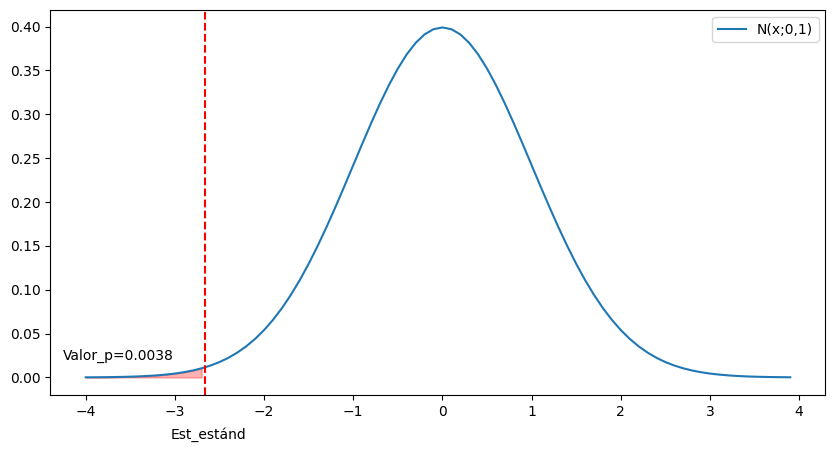

In [25]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-4, 4, 0.1)
y1 = norm.pdf(x, 0,1)
alpha = 0.01
confidence = 1-alpha
Est_estandar = (2.92-3)/(0.18/np.sqrt(36))
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="N(x;0,1)" )
plt.axvline(x=z , color='red', linestyle='--')
plt.fill_between(x, y1, where=(x <= z), color='red', alpha=0.3)
plt.text(-3.01, 0.02, "Valor_p=0.0038", horizontalalignment='right')
plt.text(-2.2, -0.07, "Est_estánd", horizontalalignment='right')
plt.legend()
plt.show()

In [26]:
1-0.0038

0.9962

In [ ]:
norm.cdf(2.98, 3, 0.18)

0.45576411895468855

# ¿Hasta qué valor de $z$ estaba dispuesto a no rechazar el inspector?

Como se indicó antes, el director del programa de pruebas de la FTC eligió como nivel de significancia 0.01. Por lo tanto:

In [27]:
valor_critico= norm.ppf(0.01, 0, 1)
valor_critico

-2.3263478740408408

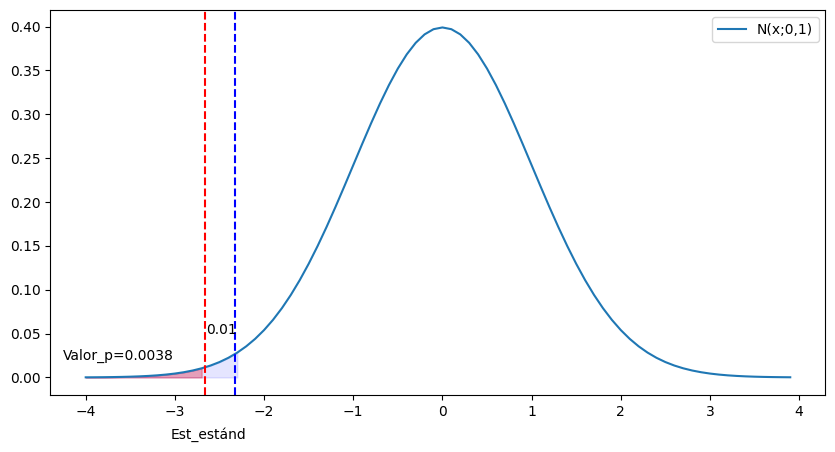

In [28]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-4, 4, 0.1)
y1 = norm.pdf(x, 0,1)
alpha = 0.01
confidence = 1-alpha
Est_estandar = (2.92-3)/(0.18/np.sqrt(36))
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="N(x;0,1)" )
plt.axvline(x=z , color='red', linestyle='--')
plt.fill_between(x, y1, where=(x <= z), color='red', alpha=0.3)
plt.text(-3.01, 0.02, "Valor_p=0.0038", horizontalalignment='right')
plt.text(-2.2, -0.07, "Est_estánd", horizontalalignment='right')
plt.axvline(x=-2.33 , color='blue', linestyle='--')
plt.fill_between(x, y1, where=(x <= -2.29), color='blue', alpha=0.1)
plt.text(-2.3, 0.05, "0.01", horizontalalignment='right')
plt.legend()
plt.show()

El inspector estaba dispuesto a no rechazar la hipótesis nula si el estadístico de prueba llegaba hasta $-2.33$ pero cualquier valor más allá de este no es aceptable porque supera la significacia en más de un 1%.

## Método del valor crítico

El este método, se debe:

1. Seleccionar las hipótesis
2. Determinar la significación
3. Determinar el estadístico de prueba a partir del dato muestral
4. Emplear en nilvel de significancia para establecer el valor crítico
5. Comparar el estadístico de prueba con el valor crítico para rechazar o no rechazar la $H_0$

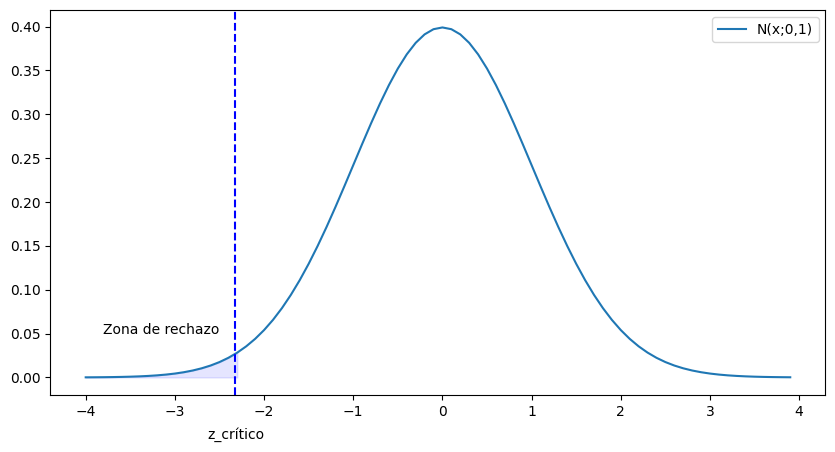

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-4, 4, 0.1)
y1 = norm.pdf(x, 0,1)
alpha = 0.01
confidence = 1-alpha
Est_estandar = (2.92-3)/(0.18/np.sqrt(36))
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="N(x;0,1)" )
plt.text(-2.0, -0.07, "z_crítico", horizontalalignment='right')
plt.axvline(x=-2.33 , color='blue', linestyle='--')
plt.fill_between(x, y1, where=(x <= -2.29), color='blue', alpha=0.1)
plt.text(-2.5, 0.05, "Zona de rechazo", horizontalalignment='right')
plt.legend()
plt.show()

## Prueba a dos colas

La U.S. Golf Association, USGA, establece reglas que deben satisfacer los fabricantes de equipos de golf si quieren que sus productos se acepten en los eventos de USGA.

MaxFlight emplea procesos de fabricación de alta tecnología para producir pelotas de golf que tienen una distancia media de recorrido de 295 yardas. Sin embargo, algunas veces el proceso se desajusta y se producen pelotas de golf que tienen una distancia media de recorrido diferente a 295 yardas.

Cuando la distancia media es menor que 295 yardas, a la empresa le preocupa perder clientes porque las pelotas de golf no proporcionen la distancia anunciada. Cuando la distancia es mayor que 295 yardas, las pelotas de MaxFlight pueden ser rechazadas por la USGA por exceder los estándares respecto de distancia de vuelo y carrera.


El programa de control de calidad de MaxFlight consiste en tomar muestras periódicas de 50 pelotas de golf y vigilar el proceso de fabricación. Con cada muestra se realiza una prueba de hipótesis para determinar si el proceso se ha desajustado.

El equipo de control de calidad elige 5% como nivel de significancia para esta prueba.


## Paso 1. Selección de las hipótesis

$$H_0: \mu = 295$$

$$H_1: \mu \neq 295$$

## Paso 2. Establecer el nivel de significancia

$$\alpha = 0.05$$

## Paso 3. Datos muestrales y cálculo del estadístico de prueba

Suponga que se toma una muestra de 50 pelotas de golf y que la media muestral es $\bar{x} =297.6$ yardas.

Datos de pruebas previas realizadas indican que se puede suponer que la desviación estándar se conoce y que su valor es $σ =12$.

**Datos**

* $\bar{x} =297.6$
* $\mu_0 = 295$
* $\sigma = 12$
* $n = 50$

### Estadístico de prueba   

$$z=\cfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$

$$z=\cfrac{297.6-295}{12/\sqrt{50}}$$




In [29]:
z= (297.6-295)/(12/np.sqrt(50))
z

1.5320646925708663

### Paso 4. Calcular el p-valor

Debemos tener presente que esta prueba es a dos colas, por lo tnto debemos pensar en los errores que se generan por valores menores a -1.53 y mayores a 1.53.

In [30]:
p_valor = norm.cdf(-1.5321, 0, 1)
p_valor

0.06274887988206794

In [31]:
p_valor = norm.sf(1.5321, 0, 1)
p_valor

0.06274887988206794

In [32]:
2*p_valor

0.12549775976413588

### Paso 5. Tomar la decisión

Rechazar $𝐻_0$ si $2*\text{p-valor} <𝜶  $

In [33]:
2*p_valor < 0.05

False

Como el nivel de significancia es 0.05, no se rechaza la hipótesis nula porque el valor-p es $0.1260> 0.05$.

Como no se rechaza la hipótesis nula, no es necesario tomar medidas para ajustar el proceso de fabricación de MaxFlight.


### Método del valor crítico

$\alpha = 0.05$

Pero debe ser dividido en dos (son dos colas)

$\alpha/2 = 0.05/2 = 0.025$

POr tanto el valor crítico es de:

In [34]:
z_critico = norm.ppf(0.025, 0, 1)
z_critico

-1.9599639845400545

Esto significa que para valores del estadístico de prueba mayores a $1.95$ o menores a $-1.95$ se rechazaría la $H_0$, pero como se obtuvo un estadístico de $z=1.53$ se encuentra en la región de no rechacho.

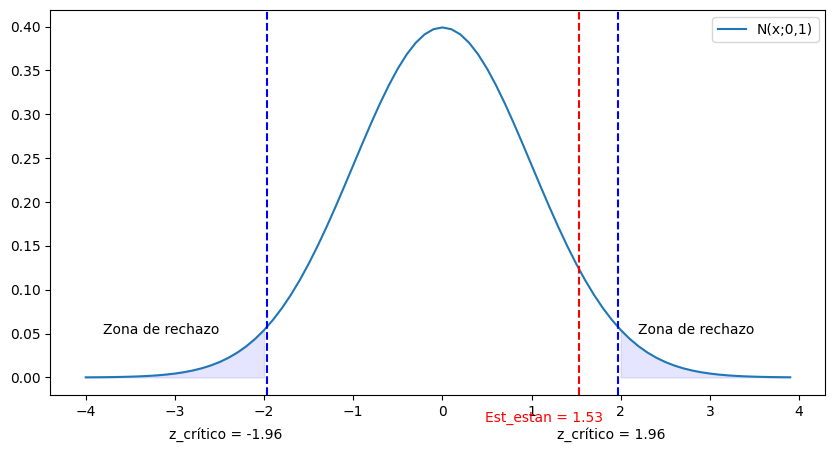

In [35]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.arange(-4, 4, 0.1)
y1 = norm.pdf(x, 0,1)
alpha = 0.05
confidence = 1-alpha
Est_estandar = 1.53
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="N(x;0,1)" )
plt.text(-1.8, -0.07, "z_crítico = -1.96", horizontalalignment='right')
plt.text(2.5, -0.07, "z_crítico = 1.96", horizontalalignment='right')
plt.text(1.8, -0.05, "Est_estan = 1.53", horizontalalignment='right', color='red')
plt.axvline(x=-1.97 , color='blue', linestyle='--')
plt.axvline(x=1.97 , color='blue', linestyle='--')
plt.fill_between(x, y1, where=(x <= -1.97), color='blue', alpha=0.1)
plt.fill_between(x, y1, where=(x >= 1.97), color='blue', alpha=0.1)
plt.text(-2.5, 0.05, "Zona de rechazo", horizontalalignment='right')
plt.text(3.5, 0.05, "Zona de rechazo", horizontalalignment='right')
plt.axvline(x=1.53 , color='red', linestyle='--')
plt.legend()
plt.show()

# Resumen de Pruebas de hipótesis

| Estadístico|         Condiciones| Estadístico de prueba  | $ H_0 $   |$ H_1 $   | Región de rechazo |
|-------------------|-------------------|------------------------------|-----------------------------------|------------------------------|-----------------------------------|
| Media|$\sigma$ conocido, $n\geq 30$| $z=\cfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$  | $ \mu = \mu_0 $   |$ \mu \neq \mu_0 $    | $z < -z_{\alpha/2}$, o, $z > -z_{\alpha/2}$ |
| Media|$\sigma$ conocido, $n\geq 30$| $z=\cfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$  | $ \mu \leq \mu_0 $   |$ \mu > \mu_0 $    |  $z > z_{\alpha/2}$ |
| Media|$\sigma$ conocido, $n\geq 30$| $z=\cfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$  | $ \mu \geq \mu_0 $   |$ \mu < \mu_0 $    |  $z < -z_{\alpha/2}$ |
| Media|$\sigma$ desconocido, $n < 30$| $t=\cfrac{\bar{x}-\mu_0}{s/\sqrt{n}}$, $gl = n-1$  | $ \mu = \mu_0 $   |$ \mu \neq \mu_0 $    | $t < -t_{\alpha/2}$, o, $tz > -t_{\alpha/2}$ |
| Media|$\sigma$ desconocido, $n < 30$| $t=\cfrac{\bar{x}-\mu_0}{s/\sqrt{n}}$, $gl = n-1$  | $ \mu \leq \mu_0 $   |$ \mu > \mu_0 $    | $t >t_{\alpha}$ |
| Media|$\sigma$ desconocido, $n < 30$| $t=\cfrac{\bar{x}-\mu_0}{s/\sqrt{n}}$, $gl = n-1$  | $ \mu \geq \mu_0 $   |$ \mu < \mu_0 $    | $t <-t_{\alpha}$ |

